<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.8%20An%C3%A1lisis%20Socioformador/Act_3_8_An%C3%A1lisis_Socioformador_Modelos_de_regresi%C3%B3n_reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score


In [ ]:
df_concatenado = pd.read_csv("df_concatenado.csv")

In [ ]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  815 non-null    int64  
 1   Veloc       815 non-null    float64
 2   Acele       815 non-null    float64
 3   Des_x       815 non-null    float64
 4   Des_y       815 non-null    float64
 5   Des_z       815 non-null    float64
 6   Presn       815 non-null    float64
 7   VelPr       815 non-null    float64
 8   AcePr       815 non-null    float64
 9   F5EEX       815 non-null    float64
 10  F6EES       815 non-null    float64
 11  F8EIX       815 non-null    float64
 12  F7EIS       815 non-null    float64
 13  F9EEX       815 non-null    float64
 14  F10ES       815 non-null    float64
 15  F11EX       815 non-null    float64
 16  F12ES       815 non-null    float64
 17  F13EV       815 non-null    float64
 18  F14EV       815 non-null    float64
 19  F17MS       815 non-null    f

<Figure size 1500x800 with 0 Axes>

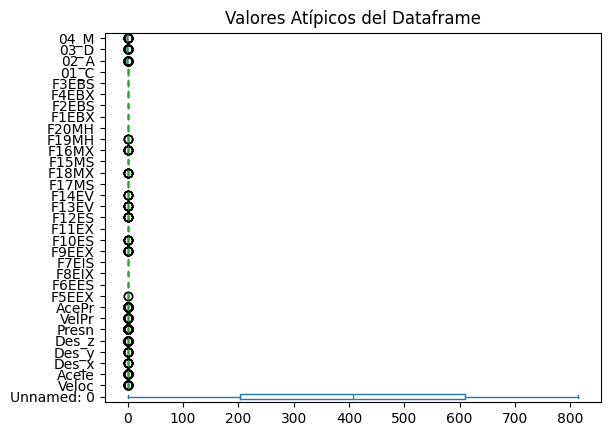

In [ ]:
fig = plt.figure(figsize =(15, 8))
df_concatenado.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [ ]:
y = df_concatenado
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)
#Estos representan los límites que se tienen en la campana de gauss


Limite superior permitido Unnamed: 0    1113.243584
Veloc            0.757562
Acele            0.721984
Des_x            0.961632
Des_y            0.617657
Des_z            0.495200
Presn            1.231080
VelPr            1.009643
AcePr            0.784432
F5EEX            0.648476
F6EES            0.776116
F8EIX            0.741485
F7EIS            0.766822
F9EEX            0.653273
F10ES            0.770468
F11EX            0.722262
F12ES            0.765784
F13EV            0.750622
F14EV            0.735175
F17MS            0.750750
F18MX            0.881430
F15MS            0.738769
F16MX            0.989600
F19MH            0.797252
F20MH            0.839847
F1EBX            0.858351
F2EBS            0.959711
F4EBX            0.855966
F3EBS            0.701853
01_C             1.000000
02_A             0.715107
03_D             0.641051
04_M             0.096596
dtype: float64
Limite inferior permitido Unnamed: 0   -299.243584
Veloc          -0.276822
Acele          -0.368158


In [ ]:
data3 = df_concatenado[(y <= limite_superior) & (y >= limite_inferior)]
data3

,Unnamed: 0,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.000000,0.000000,0.382705,...,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1.0,-1.0,NaN
1,1,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.500000,0.000000,0.407816,...,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1.0,-1.0,-1.0
2,2,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.500000,0.000000,0.394415,...,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1.0,-1.0,-1.0
3,3,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.250000,0.500000,0.393504,...,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1.0,-1.0,-1.0
4,4,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.250000,0.500000,0.464759,...,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,810,0.201407,0.141924,0.342566,0.150338,0.084954,0.028139,0.039216,0.051546,0.306510,...,0.431985,0.549316,0.371709,0.602631,0.261456,0.151787,1,-1.0,-1.0,-1.0
811,811,0.217667,0.101118,0.319890,0.175950,0.079696,0.032468,0.029412,0.051546,0.299633,...,0.419139,0.571710,0.366695,0.575514,0.250619,0.120553,1,-1.0,-1.0,-1.0
812,812,0.219301,0.123337,0.293772,0.207804,0.083797,0.034632,0.019608,0.041237,0.304520,...,0.420119,0.576957,0.369896,0.560459,0.242053,0.120685,1,-1.0,-1.0,-1.0
813,813,0.178517,0.180606,0.198449,0.193743,0.094648,0.038961,0.019608,0.030928,0.283117,...,0.420565,0.582169,0.352580,0.557310,0.247453,0.121717,1,-1.0,-1.0,-1.0


In [ ]:

#Corroboramos dataframes valores nulos del dataframe4 El metodo de desviacion detecta menos outliers
#Con el metodo rangointercualtilicoy el digrama de caja y bigote usa ese metodo de rangointercualitico
valores_nulos = data3.isnull().sum()
valores_nulos

,0
Unnamed: 0,0
Veloc,15
Acele,22
Des_x,5
Des_y,12
Des_z,13
Presn,0
VelPr,0
AcePr,18
F5EEX,0


In [ ]:
#Reemplazamos valores átipicos  (nulos deldataframe con "mean")
#Realizamos una copia del dataframe
data_clean = df_concatenado.copy()
data_clean = data_clean.fillna(round(y.mean(),1))
data_clean


,Unnamed: 0,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0,0.113887,0.124697,0.027252,0.165311,0.030352,1.000000,0.000000,0.000000,0.382705,...,0.579768,0.482031,0.389961,0.446523,0.547479,0.309230,1,-1,-1,1
1,1,0.079856,0.012105,0.058577,0.117830,0.025480,0.666667,0.500000,0.000000,0.407816,...,0.667279,0.413487,0.254316,0.799305,0.603402,0.488302,1,-1,-1,-1
2,2,0.066518,0.004933,0.024961,0.084477,0.064421,0.833333,0.500000,0.000000,0.394415,...,0.627172,0.458465,0.328168,0.782442,0.554432,0.471489,1,-1,-1,-1
3,3,0.127785,0.083641,0.129497,0.050828,0.073877,0.833333,0.250000,0.500000,0.393504,...,0.617237,0.490490,0.377981,0.776731,0.524078,0.478002,1,-1,-1,-1
4,4,0.127386,0.084154,0.141091,0.076182,0.030312,0.833333,0.250000,0.500000,0.464759,...,0.587643,0.460727,0.385479,0.760682,0.535604,0.477068,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,810,0.201407,0.141924,0.342566,0.150338,0.084954,0.028139,0.039216,0.051546,0.306510,...,0.431985,0.549316,0.371709,0.602631,0.261456,0.151787,1,-1,-1,-1
811,811,0.217667,0.101118,0.319890,0.175950,0.079696,0.032468,0.029412,0.051546,0.299633,...,0.419139,0.571710,0.366695,0.575514,0.250619,0.120553,1,-1,-1,-1
812,812,0.219301,0.123337,0.293772,0.207804,0.083797,0.034632,0.019608,0.041237,0.304520,...,0.420119,0.576957,0.369896,0.560459,0.242053,0.120685,1,-1,-1,-1
813,813,0.178517,0.180606,0.198449,0.193743,0.094648,0.038961,0.019608,0.030928,0.283117,...,0.420565,0.582169,0.352580,0.557310,0.247453,0.121717,1,-1,-1,-1


In [ ]:
#Quiero ver los valores nulos en columnas
valores_nulos = data_clean.isnull().sum()
valores_nulos


,0
Unnamed: 0,0
Veloc,0
Acele,0
Des_x,0
Des_y,0
Des_z,0
Presn,0
VelPr,0
AcePr,0
F5EEX,0


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  815 non-null    int64  
 1   Veloc       815 non-null    float64
 2   Acele       815 non-null    float64
 3   Des_x       815 non-null    float64
 4   Des_y       815 non-null    float64
 5   Des_z       815 non-null    float64
 6   Presn       815 non-null    float64
 7   VelPr       815 non-null    float64
 8   AcePr       815 non-null    float64
 9   F5EEX       815 non-null    float64
 10  F6EES       815 non-null    float64
 11  F8EIX       815 non-null    float64
 12  F7EIS       815 non-null    float64
 13  F9EEX       815 non-null    float64
 14  F10ES       815 non-null    float64
 15  F11EX       815 non-null    float64
 16  F12ES       815 non-null    float64
 17  F13EV       815 non-null    float64
 18  F14EV       815 non-null    float64
 19  F17MS       815 non-null    f

In [ ]:
data_clean.shape

(815, 33)

In [ ]:
Corre_Factors = data_clean.corr()

In [ ]:
Corre_Factors = abs(Corre_Factors)
Corre_Factors

,Unnamed: 0,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,F8EIX,F7EIS,F9EEX,F10ES,F11EX,F12ES,F13EV,F14EV,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
Unnamed: 0,1.000000,0.321913,0.290210,0.327652,0.250629,0.249103,0.147282,0.015157,0.011067,0.052757,0.098376,0.068741,0.069419,0.014562,0.020478,0.023461,0.004311,0.054767,0.040067,0.030567,0.013018,0.004226,0.074516,0.016275,0.057080,0.050763,0.019782,0.027930,0.028461,NaN,0.041938,0.042307,0.003932
Veloc,0.321913,1.000000,0.858976,0.869011,0.751242,0.573992,0.150334,0.054483,0.094831,0.031844,0.153165,0.137879,0.144904,0.050081,0.208914,0.183721,0.169906,0.108071,0.170309,0.053532,0.314035,0.097760,0.257018,0.298936,0.098405,0.080924,0.088253,0.142873,0.035016,NaN,0.171030,0.114274,0.323145
Acele,0.290210,0.858976,1.000000,0.669102,0.712589,0.535295,0.141180,0.056501,0.137045,0.084201,0.132968,0.087191,0.077550,0.008754,0.157161,0.103013,0.097452,0.045840,0.092594,0.056190,0.322389,0.070341,0.236910,0.276579,0.048839,0.135662,0.135967,0.208322,0.109684,NaN,0.049877,0.025596,0.288187
Des_x,0.327652,0.869011,0.669102,1.000000,0.448287,0.348977,0.021423,0.009546,0.160312,0.020289,0.093540,0.142389,0.147064,0.115992,0.218153,0.241737,0.244931,0.194059,0.216373,0.081403,0.272948,0.038759,0.144575,0.352157,0.262767,0.088186,0.052430,0.147406,0.038053,NaN,0.300633,0.269381,0.226552
Des_y,0.250629,0.751242,0.712589,0.448287,1.000000,0.429416,0.110890,0.167685,0.002076,0.128197,0.097882,0.063072,0.060012,0.171667,0.081404,0.084970,0.092610,0.043575,0.126854,0.203316,0.159670,0.231866,0.287993,0.043717,0.172922,0.130220,0.031211,0.029726,0.158091,NaN,0.106591,0.184393,0.351017
Des_z,0.249103,0.573992,0.535295,0.348977,0.429416,1.000000,0.269801,0.258282,0.053592,0.110283,0.201114,0.246841,0.206536,0.094418,0.100946,0.161529,0.062023,0.132817,0.006540,0.143449,0.203016,0.094324,0.303456,0.151614,0.146546,0.084140,0.073288,0.085805,0.026968,NaN,0.183168,0.185941,0.166047
Presn,0.147282,0.150334,0.141180,0.021423,0.110890,0.269801,1.000000,0.249180,0.242050,0.266447,0.550507,0.435848,0.496605,0.262143,0.341563,0.268518,0.258532,0.274637,0.123048,0.002066,0.414807,0.044553,0.507435,0.320072,0.124881,0.039933,0.019614,0.211378,0.262706,NaN,0.218967,0.208866,0.070015
VelPr,0.015157,0.054483,0.056501,0.009546,0.167685,0.258282,0.249180,1.000000,0.639169,0.310849,0.216606,0.421590,0.351879,0.142716,0.168204,0.313950,0.150018,0.069252,0.048275,0.311983,0.126716,0.393575,0.390370,0.019251,0.487012,0.079776,0.002173,0.483866,0.203967,NaN,0.087647,0.084976,0.058009
AcePr,0.011067,0.094831,0.137045,0.160312,0.002076,0.053592,0.242050,0.639169,1.000000,0.284463,0.234442,0.386159,0.315089,0.158963,0.173495,0.244965,0.213855,0.010637,0.002147,0.169385,0.200402,0.213611,0.297882,0.086449,0.416937,0.029269,0.082911,0.337551,0.101414,NaN,0.070051,0.065849,0.037143
F5EEX,0.052757,0.031844,0.084201,0.020289,0.128197,0.110283,0.266447,0.310849,0.284463,1.000000,0.655290,0.804000,0.787674,0.885849,0.514199,0.794267,0.737450,0.346991,0.173832,0.242415,0.121554,0.330610,0.186246,0.229421,0.022794,0.149744,0.056435,0.030006,0.182739,NaN,0.368806,0.420202,0.003824


In [ ]:
# Ajustar maximo de columnas
pd.options.display.max_columns = None

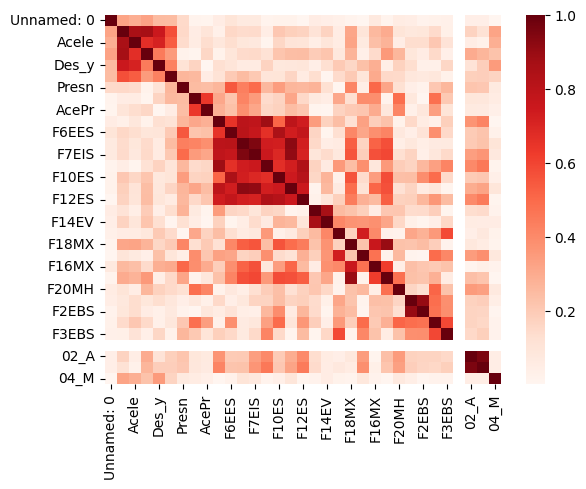

In [ ]:
Heat_Map = sns.heatmap(Corre_Factors, cmap = 'Reds', annot= False, fmt= ".2f")

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = data_clean[['Acele', 'Des_x', 'Des_y', 'Des_z']]
Vars_dep = data_clean['Veloc']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Acele', 'Des_x', 'Des_y', 'Des_z'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([0.18772224, 0.4328746 , 0.35559739, 0.2070065 ]),
 'rank_': 4,
 'singular_': array([8.15598177, 3.99048583, 2.83507756, 2.23451824]),
 'intercept_': -0.015113601263189114}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=data_clean[['Acele', 'Des_x', 'Des_y', 'Des_z']])
y_pred

array([0.08515838, 0.05968962, 0.03999264, 0.09001097, 0.09512388,
       0.03311188, 0.05731441, 0.07121663, 0.09748518, 0.08784911,
       0.03229377, 0.05529993, 0.3208243 , 0.29948682, 0.3545593 ,
       0.31763469, 0.12784849, 0.06922192, 0.06638773, 0.09813614,
       0.12291483, 0.10278252, 0.08200163, 0.36217409, 0.34122827,
       0.0359246 , 0.07358832, 0.07435833, 0.04941874, 0.03855985,
       0.04422122, 0.04409326, 0.07445332, 0.03967536, 0.04369319,
       0.02979801, 0.04618728, 0.04501806, 0.01929056, 0.02002662,
       0.05615021, 0.06608141, 0.0694611 , 0.06732125, 0.04828116,
       0.33557963, 0.43968685, 0.28911303, 0.06264094, 0.14118362,
       0.17469575, 0.38424595, 0.3509451 , 0.06437568, 0.1695273 ,
       0.18320705, 0.07168979, 0.06382261, 0.03728072, 0.08125804,
       0.0800249 , 0.03630362, 0.07958432, 0.1359906 , 0.08659055,
       0.06813689, 0.06787561, 0.12346783, 0.25177659, 0.12679533,
       0.04547855, 0.04669135, 0.60581097, 0.65005987, 0.13623

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.958468336763693

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9790139614753678

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = data_clean[['Veloc', 'Des_x', 'Des_y','Des_z']]
Vars_dep = data_clean['Acele']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Veloc', 'Des_x', 'Des_y', 'Des_z'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.19315733, -0.26098592,  0.00810573, -0.01094971]),
 'rank_': 4,
 'singular_': array([8.34916445, 3.77369915, 2.82934994, 0.91740884]),
 'intercept_': -0.030713664551009878}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=data_clean[['Veloc', 'Des_x', 'Des_y','Des_z']])
y_pred

array([ 9.90665879e-02,  4.99554401e-02,  4.21171351e-02,  8.75603220e-02,
        8.47405293e-02,  1.82489050e-02,  3.76217996e-02,  6.32786121e-02,
        9.47809240e-02,  6.80024918e-02,  2.19511869e-03,  3.07919707e-02,
        1.34672824e-01,  2.31531427e-01,  2.95226664e-01,  1.75221214e-01,
        5.05222471e-02,  3.35068074e-02,  4.08442260e-02,  3.83657531e-02,
        4.09945928e-02,  3.27492419e-02,  3.96282598e-03,  3.29177751e-01,
        3.14784936e-01, -2.56754318e-02,  4.27980052e-02,  8.16370889e-02,
        5.68818527e-02,  5.28858283e-02,  3.82182774e-02,  4.61068894e-02,
        4.18419219e-02,  2.86085266e-02,  3.41582034e-02,  7.06169717e-03,
        2.40112431e-02,  2.89159096e-02,  3.87584551e-03, -5.13214165e-03,
        2.23885380e-02,  4.04864909e-02,  5.35762110e-02,  5.49899552e-02,
        2.76571528e-02,  2.82459960e-01,  4.80288043e-01,  2.61678064e-01,
        4.85018950e-02,  1.47198164e-01,  1.72597907e-01,  4.31407772e-01,
        3.63010659e-01,  

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.7623389417807447

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8731202332902065

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = data_clean[['F6EES', 'F8EIX', 'F7EIS','F18MX']]
Vars_dep = data_clean['Presn']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['F6EES', 'F8EIX', 'F7EIS', 'F18MX'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.38695124, -1.9235557 ,  1.51790641,  0.40814233]),
 'rank_': 4,
 'singular_': array([5.82516974, 2.89411513, 1.5655702 , 0.70265534]),
 'intercept_': -0.1771773770808563}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=data_clean[['F6EES', 'F8EIX', 'F7EIS','F18MX']])
y_pred

array([0.56809473, 0.66989472, 0.75693212, 0.79513458, 0.76959994,
       0.68410328, 0.62587295, 0.6417146 , 0.70045323, 0.68518118,
       0.57030937, 0.47181133, 0.54070606, 0.58777892, 0.46888552,
       0.45620602, 0.40847941, 0.48321153, 0.45392927, 0.4863367 ,
       0.52563937, 0.54433782, 0.56415507, 0.55982177, 0.60107021,
       0.66014329, 0.624077  , 0.55273649, 0.48647903, 0.55256829,
       0.57483049, 0.59428166, 0.53548607, 0.34045901, 0.29244512,
       0.25669416, 0.22446966, 0.20960697, 0.17624589, 0.2143482 ,
       0.28767074, 0.31131078, 0.33134432, 0.30119595, 0.38204599,
       0.37997832, 0.42519991, 0.35220266, 0.45071834, 0.56957753,
       0.6279419 , 0.72281131, 0.70964473, 0.6437916 , 0.56400172,
       0.5741834 , 0.49501483, 0.41855523, 0.43619236, 0.4901491 ,
       0.60421228, 0.62445952, 0.65696476, 0.53632289, 0.48429163,
       0.42067378, 0.47431019, 0.5015985 , 0.56973341, 0.59022313,
       0.98380478, 1.13123265, 0.55507031, 0.55943823, 0.65470

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.40681259590755736

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6378186230485571

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión no Lineal
vars_Indep = data_clean['F6EES']
var_Dep = data_clean['Presn']

In [ ]:
x = vars_Indep
y = var_Dep

In [ ]:
def func1 (x,a,b,c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs = curve_fit(func1, data_clean['F6EES'], data_clean['Presn'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.74128693,  1.99817185, -0.27100544])

In [ ]:
#Preducciones
y_pred1 = func1(x, *parametros1)


In [ ]:
#Calculamos las predicciones y reestauramos el vector de predicciones
y_pred1

,F6EES
0,0.595572
1,0.692405
2,0.745166
3,0.770627
4,0.791444
...,...
810,0.314295
811,0.317909
812,0.318154
813,0.288953


In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

0.3043566175037141

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
R = np.sqrt(R2_Modelo1)
R

0.551685252207918

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión no Lineal
vars_Indep = data_clean['F6EES']
var_Dep = data_clean['Presn']

In [ ]:
x = vars_Indep
y = var_Dep

In [ ]:
def func1(x, a, b, c):
  return (a*x**2 + b)/ c*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs = curve_fit(func1, data_clean['F6EES'], data_clean['Presn'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([0.55039885, 1.25536597, 1.31793233])

In [ ]:
#Preducciones
y_pred1 = func1(x, *parametros1)


In [ ]:
#Calculamos las predicciones y reestauramos el vector de predicciones
y_pred1

,F6EES
0,0.584237
1,0.702856
2,0.779319
3,0.820118
4,0.855716
...,...
810,0.334145
811,0.336779
812,0.336958
813,0.315981


In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

0.29835133549551585

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
R = np.sqrt(R2_Modelo1)
R

0.5462154661811727

In [ ]:
Vars_indep = data_clean['Acele']
Vars_dep = data_clean['Veloc']

In [ ]:
x = vars_Indep
y = var_Dep

In [ ]:
def func_1(x,a,b,c):
  return a*np.exp(-b*x) + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs = curve_fit(func1, data_clean['Acele'], data_clean['Veloc'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.13933203,  0.91476273,  0.08749151])

In [ ]:
#Preducciones
y_pred1 = func1(x, *parametros1)


In [ ]:
#Calculamos las predicciones y reestauramos el vector de predicciones
y_pred1

,F6EES
0,0.543214
1,0.607643
2,0.645239
3,0.664173
4,0.680099
...,...
810,0.377810
811,0.379788
812,0.379923
813,0.364027


In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

0.25425508775763805

In [ ]:
#Calculamos el coeficiente de correlacion del modelo
R = np.sqrt(R2_Modelo1)
R

0.5042371344492966